# 크롤링 3일차

## 유튜브 분석하기

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [2]:
#크롬드라이버를 실행
driver = webdriver.Chrome("chromedriver.exe")
#백종원 요리비책 페이지로 이동
driver.get('https://www.youtube.com/channel/UCyn-K7rZLXjGl7VXGweIlcA/videos')

### 화면 끝까지 스크롤

In [3]:
import time 
#한번 스크롤하고 잠깐 멈출 시간을 저장한 변수 0.5초를 멈출것임
SCROLL_PAUSE_TIME = 0.5
body = driver.find_element_by_tag_name("body")

#### 어떻게 스크롤 되는거징... 잘 모르겠어 엔드키...?

In [4]:
import time 
SCROLL_PAUSE_TIME = 0.5
body = driver.find_element_by_tag_name("body")

while True:
    last_height = driver.execute_script("return document.documentElement.scrollHeight")
    print("===================================================")
    print("last_height",last_height)

    for i in range(10):
        body.send_keys(Keys.END)
        time.sleep(SCROLL_PAUSE_TIME)
    new_height =driver.execute_script("return document.documentElement.scrollHeight")
    print("new_height:", new_height)
    print("====================================================")

    if new_height == last_height:
        break

last_height 2355
new_height: 17656
last_height 17656
new_height: 17656


## 페이지소스 리턴

In [5]:
page = driver.page_source
page

s":"CAgQteYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l"}},"backButton":{"buttonRenderer":{"trackingParams":"CAcQvIYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l","command":{"clickTrackingParams":"CAcQvIYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l","commandMetadata":{"webCommandMetadata":{"sendPost":true}},"signalServiceEndpoint":{"signal":"CLIENT_SIGNAL","actions":[{"clickTrackingParams":"CAcQvIYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l","signalAction":{"signal":"HISTORY_BACK"}}]}}}},"forwardButton":{"buttonRenderer":{"trackingParams":"CAYQvYYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l","command":{"clickTrackingParams":"CAYQvYYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l","commandMetadata":{"webCommandMetadata":{"sendPost":true}},"signalServiceEndpoint":{"signal":"CLIENT_SIGNAL","actions":[{"clickTrackingParams":"CAYQvYYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l","signalAction":{"signal":"HISTORY_FORWARD"}}]}}}},"a11ySkipNavigationButton":{"buttonRenderer":{"style":"STYLE_DEFAULT","size":"SIZE_DEFAULT","isDisabled":false,"text":{"runs":[{"text":"탐색 건너뛰기"}]},"trackingParams":"CAUQ8F

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, 'lxml')
soup

kingParams":"CAgQteYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l"}},"backButton":{"buttonRenderer":{"trackingParams":"CAcQvIYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l","command":{"clickTrackingParams":"CAcQvIYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l","commandMetadata":{"webCommandMetadata":{"sendPost":true}},"signalServiceEndpoint":{"signal":"CLIENT_SIGNAL","actions":[{"clickTrackingParams":"CAcQvIYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l","signalAction":{"signal":"HISTORY_BACK"}}]}}}},"forwardButton":{"buttonRenderer":{"trackingParams":"CAYQvYYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l","command":{"clickTrackingParams":"CAYQvYYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l","commandMetadata":{"webCommandMetadata":{"sendPost":true}},"signalServiceEndpoint":{"signal":"CLIENT_SIGNAL","actions":[{"clickTrackingParams":"CAYQvYYDIhMIqs2ngs2l8AIVC9pMAh2mRA2l","signalAction":{"signal":"HISTORY_FORWARD"}}]}}}},"a11ySkipNavigationButton":{"buttonRenderer":{"style":"STYLE_DEFAULT","size":"SIZE_DEFAULT","isDisabled":false,"text":{"runs":[{"text":"탐색 건너뛰기"}]},"trackingParams

In [7]:
all_videos = soup.find_all(id='dismissible')
all_videos

LT"><!--css-build:shady--><yt-icon class="style-scope ytd-thumbnail-overlay-time-status-renderer" disable-upgrade="" hidden=""></yt-icon><span aria-label="1분 31초" class="style-scope ytd-thumbnail-overlay-time-status-renderer">
   1:31
 </span></ytd-thumbnail-overlay-time-status-renderer><ytd-thumbnail-overlay-now-playing-renderer class="style-scope ytd-thumbnail"><!--css-build:shady--><span class="style-scope ytd-thumbnail-overlay-now-playing-renderer">지금 재생 중</span>
 <ytd-thumbnail-overlay-equalizer class="style-scope ytd-thumbnail-overlay-now-playing-renderer"><!--css-build:shady--><svg class="style-scope ytd-thumbnail-overlay-equalizer" id="equalizer" viewbox="0 0 55 95" xmlns="http://www.w3.org/2000/svg">
 <g class="style-scope ytd-thumbnail-overlay-equalizer">
 <rect class="bar style-scope ytd-thumbnail-overlay-equalizer" x="0"></rect>
 <rect class="bar style-scope ytd-thumbnail-overlay-equalizer" x="20"></rect>
 <rect class="bar style-scope ytd-thumbnail-overlay-equalizer" x="40"

### 유튜브 제목 크롤링

In [8]:
title_list =[]
for video in all_videos:
    title = video.find(id = "video-title")
    if len(title.text.strip())>0:
        title_list.append(title.text)

print(title_list)
print(len(title_list))

['감자탕! 돼지등뼈 없이도 가능해요 (feat. 찍어먹는 겨자 소스 만들기)', '🧄마늘은 많이 많이!🧄알리오올리오 떡볶이', '크림 없이 크림새우, 어떻게 만들까요? 재료 간단, 만드는 법은 더 간단!', "'부'대찌개맛 '뿌'햄라면", "이 카레의 주인공은 '고기'입니다. 고기 듬뿍 뒷다릿살 카레", '만 번(?) 저어 만드는 수제 마요네즈!💪', '겉절이 어렵지 않아요! 만능양념장과 함께라면 봄나물 완전정복~', "'참치마요' 만들어서 고급진 토스트까지! (준비물:남은 치킨무)", '멸치 없이 채수로~ 쉽고 빠른 잔치국수 만들기!', '찬물라면! 저도 끓여보았습니다. 그것도 10개를 한번에!', '육쌈 비빔면! 제가 비빔면 먹는 방법', '🔥부대찌개🔥 육수 없이도 진한 맛 내는 방법! (+T.M.T 주의)', '집에서 세계요리! 돼지고기 생강구이 (+맛술 고르는 팁!)', '집에서 팟타이 도전! 간장, 식초, 액젓으로 간단하게~', '살찌는 조합 = 그 정도로 맛있다는 거죠! 몬테크리스토 샌드위치', '밥상위의 치트키 소고기 장조림 (feat. 버터 비빔밥)', '3월 3일 삼겹살데이! 뒷다리살도 삼겹살 만큼 맛있게 먹는 꿀팁!', "다 때려넣으면 끝~ 제일 쉬운 '어묵볶음'", '치즈라면전, 맛이 없을 수 없는 조합~', '진짜 쉬워요~ 달짝지근 궁중 떡볶이!', '사먹는 맛 그대로! 뜨끈뜨끈 갈비탕 만들어보세요~', "'백종원의 요리비책'과 함께 즐거운 설날 보내세요!", '설 맞이 꼬치산적! 그리고 설 전 꼭 해야 할 일은?', '설날을 기다리며 김치만두 만들어요!', '빈대떡 먹고 싶을 때 뚝딱! 고소~한 콩전', '기사식당st 돼지불백, 추억의 그 맛!', '뺏어 먹어도 무죄! 꾸덕꾸덕 크림 떡볶이~', '편견을 버리세요! 청국장이 좋아지는 레시피', '파전은 먹고 싶은데, 쪽파가 없다면?', '배달시켜 먹고 남은 탕수육 더 맛있게 먹는 법?!', '조금 특별한 굴전?! (feat.스리라차)', '이탈리아 정통 말고 한국 스타일! K-알리오올리

### 유튜브 비디오시간 조회

In [9]:
video_time_list=[]
for video in all_videos:
    video_time = video.find('span',{"class":'style-scope ytd-thumbnail-overlay-time-status-renderer'})
    video_time_list.append(video_time.text.strip())

print(video_time_list)
print(len(video_time_list))

['12:08', '9:21', '10:26', '5:25', '11:23', '8:41', '8:46', '8:54', '10:53', '10:20', '9:02', '13:51', '8:56', '9:39', '8:12', '10:57', '10:23', '7:52', '9:10', '10:19', '14:48', '2:03', '10:24', '10:44', '7:04', '11:21', '8:49', '11:49', '9:51', '10:20', '8:40', '13:12', '8:10', '11:08', '11:43', '12:38', '10:03', '13:53', '11:32', '3:26', '14:00', '1:09', '7:21', '8:07', '8:50', '11:33', '11:58', '9:27', '6:07', '12:58', '5:07', '9:45', '5:41', '11:39', '5:28', '5:02', '8:45', '6:08', '10:02', '9:47', '19:10', '8:59', '9:33', '11:52', '11:51', '8:15', '12:08', '9:16', '5:28', '9:57', '8:41', '3:44', '6:40', '9:58', '8:55', '14:12', '12:21', '10:06', '6:39', '13:05', '7:16', '5:05', '5:46', '14:36', '8:46', '7:47', '14:27', '11:08', '10:06', '5:08', '11:08', '9:53', '12:21', '12:30', '9:34', '10:55', '13:41', '18:44', '6:33', '8:40', '7:31', '14:09', '12:23', '8:58', '11:42', '10:47', '16:14', '10:21', '8:21', '13:18', '6:12', '7:52', '8:50', '11:22', '9:19', '17:04', '12:44', '5:42',

In [10]:
video_time_seperate_list=[]

for time in video_time_list:
    time_list = time.split(":")
    if len(time_list)<3:
        video_time_seperate_list.append(int(time_list[0])*60+int(time_list[1]))
    else:
        video_time_seperate_list.append(int(time_list[0])*3600+int(time_list[1])*60+int(time_list[2]))

video_time_seperate_list

[728,
 561,
 626,
 325,
 683,
 521,
 526,
 534,
 653,
 620,
 542,
 831,
 536,
 579,
 492,
 657,
 623,
 472,
 550,
 619,
 888,
 123,
 624,
 644,
 424,
 681,
 529,
 709,
 591,
 620,
 520,
 792,
 490,
 668,
 703,
 758,
 603,
 833,
 692,
 206,
 840,
 69,
 441,
 487,
 530,
 693,
 718,
 567,
 367,
 778,
 307,
 585,
 341,
 699,
 328,
 302,
 525,
 368,
 602,
 587,
 1150,
 539,
 573,
 712,
 711,
 495,
 728,
 556,
 328,
 597,
 521,
 224,
 400,
 598,
 535,
 852,
 741,
 606,
 399,
 785,
 436,
 305,
 346,
 876,
 526,
 467,
 867,
 668,
 606,
 308,
 668,
 593,
 741,
 750,
 574,
 655,
 821,
 1124,
 393,
 520,
 451,
 849,
 743,
 538,
 702,
 647,
 974,
 621,
 501,
 798,
 372,
 472,
 530,
 682,
 559,
 1024,
 764,
 342,
 798,
 943,
 604,
 640,
 726,
 680,
 1018,
 910,
 713,
 892,
 604,
 893,
 665,
 359,
 459,
 379,
 315,
 316,
 566,
 363,
 428,
 629,
 640,
 771,
 740,
 400,
 629,
 745,
 668,
 611,
 891,
 740,
 590,
 527,
 682,
 625,
 808,
 838,
 644,
 769,
 684,
 452,
 916,
 617,
 490,
 745,
 698,
 886,
 

### 유튜브 조회수 조회/조회수 크롤링

In [11]:
view_num_list=[]
import re

view_num_regexp = re.compile(r'조회수')

for video in all_videos:
    view_num = video.find('span',{"class":'style-scope ytd-grid-video-renderer'})

    if view_num_regexp.search(view_num.text):
        view_num_list.append(view_num.text)

view_num_list

['조회수 23만회',
 '조회수 26만회',
 '조회수 43만회',
 '조회수 58만회',
 '조회수 50만회',
 '조회수 16만회',
 '조회수 25만회',
 '조회수 41만회',
 '조회수 49만회',
 '조회수 225만회',
 '조회수 50만회',
 '조회수 110만회',
 '조회수 22만회',
 '조회수 41만회',
 '조회수 59만회',
 '조회수 44만회',
 '조회수 41만회',
 '조회수 44만회',
 '조회수 45만회',
 '조회수 30만회',
 '조회수 113만회',
 '조회수 25만회',
 '조회수 38만회',
 '조회수 51만회',
 '조회수 37만회',
 '조회수 123만회',
 '조회수 63만회',
 '조회수 80만회',
 '조회수 44만회',
 '조회수 51만회',
 '조회수 55만회',
 '조회수 184만회',
 '조회수 111만회',
 '조회수 87만회',
 '조회수 68만회',
 '조회수 72만회',
 '조회수 41만회',
 '조회수 243만회',
 '조회수 63만회',
 '조회수 75만회',
 '조회수 156만회',
 '조회수 78만회',
 '조회수 91만회',
 '조회수 99만회',
 '조회수 40만회',
 '조회수 141만회',
 '조회수 45만회',
 '조회수 93만회',
 '조회수 16만회',
 '조회수 83만회',
 '조회수 20만회',
 '조회수 136만회',
 '조회수 73만회',
 '조회수 98만회',
 '조회수 25만회',
 '조회수 62만회',
 '조회수 42만회',
 '조회수 89만회',
 '조회수 61만회',
 '조회수 32만회',
 '조회수 135만회',
 '조회수 71만회',
 '조회수 138만회',
 '조회수 162만회',
 '조회수 335만회',
 '조회수 167만회',
 '조회수 199만회',
 '조회수 89만회',
 '조회수 29만회',
 '조회수 44만회',
 '조회수 146만회',
 '조회수 28만회',
 '조회수 64만회',
 '조회수 214만회',
 '조회수 63만회',
 '조회수 6

In [12]:
view_num_type_list=[]
for view in view_num_list:
    view = view.replace("조회수 ","")
    num = float(view[:-2])
    danwee = view[:-2]
    if danwee =="만회":
        view_num_type_list.append(int(num*10000))
    else:
        view_num_type_list.append(int(num*1000))

view_num_type_list

[23000,
 26000,
 43000,
 58000,
 50000,
 16000,
 25000,
 41000,
 49000,
 225000,
 50000,
 110000,
 22000,
 41000,
 59000,
 44000,
 41000,
 44000,
 45000,
 30000,
 113000,
 25000,
 38000,
 51000,
 37000,
 123000,
 63000,
 80000,
 44000,
 51000,
 55000,
 184000,
 111000,
 87000,
 68000,
 72000,
 41000,
 243000,
 63000,
 75000,
 156000,
 78000,
 91000,
 99000,
 40000,
 141000,
 45000,
 93000,
 16000,
 83000,
 20000,
 136000,
 73000,
 98000,
 25000,
 62000,
 42000,
 89000,
 61000,
 32000,
 135000,
 71000,
 138000,
 162000,
 335000,
 167000,
 199000,
 89000,
 29000,
 44000,
 146000,
 28000,
 64000,
 214000,
 63000,
 61000,
 155000,
 425000,
 147000,
 117000,
 429000,
 13000,
 35000,
 162000,
 24000,
 44000,
 86000,
 92000,
 149000,
 44000,
 80000,
 87000,
 39000,
 76000,
 73000,
 606000,
 93000,
 346000,
 27000,
 206000,
 210000,
 101000,
 54000,
 134000,
 166000,
 236000,
 106000,
 79000,
 94000,
 30000,
 59000,
 64000,
 210000,
 61000,
 186000,
 405000,
 195000,
 45000,
 59000,
 85000,
 7

In [13]:
dict_youtube={'title':title_list, "video_time":video_time_seperate_list,"view_num":view_num_type_list}

In [14]:
import pandas as pd
youtube = pd.DataFrame(dict_youtube)
youtube.head()

,title,video_time,view_num
0,감자탕! 돼지등뼈 없이도 가능해요 (feat. 찍어먹는 겨자 소스 만들기),728,23000
1,🧄마늘은 많이 많이!🧄알리오올리오 떡볶이,561,26000
2,"크림 없이 크림새우, 어떻게 만들까요? 재료 간단, 만드는 법은 더 간단!",626,43000
3,'부'대찌개맛 '뿌'햄라면,325,58000
4,이 카레의 주인공은 '고기'입니다. 고기 듬뿍 뒷다릿살 카레,683,50000


In [15]:
youtube.head(50)

,title,video_time,view_num
0,감자탕! 돼지등뼈 없이도 가능해요 (feat. 찍어먹는 겨자 소스 만들기),728,23000
1,🧄마늘은 많이 많이!🧄알리오올리오 떡볶이,561,26000
2,"크림 없이 크림새우, 어떻게 만들까요? 재료 간단, 만드는 법은 더 간단!",626,43000
3,'부'대찌개맛 '뿌'햄라면,325,58000
4,이 카레의 주인공은 '고기'입니다. 고기 듬뿍 뒷다릿살 카레,683,50000
5,만 번(?) 저어 만드는 수제 마요네즈!💪,521,16000
6,겉절이 어렵지 않아요! 만능양념장과 함께라면 봄나물 완전정복~,526,25000
7,'참치마요' 만들어서 고급진 토스트까지! (준비물:남은 치킨무),534,41000
8,멸치 없이 채수로~ 쉽고 빠른 잔치국수 만들기!,653,49000
9,찬물라면! 저도 끓여보았습니다. 그것도 10개를 한번에!,620,225000


In [16]:
youtube.tail()

,title,video_time,view_num
295,[안녕하세요 백종원입니다-5] 장사이야기! 제가 정답이 아닙니다,136,33000
296,"[안녕하세요 백종원입니다-4] 제대로 된 한식 레시피, 이렇게 알리고 싶었습니다",279,53000
297,[안녕하세요 백종원입니다-3] 제 전문적 지식은 한참 아래입니다,91,51000
298,[안녕하세요 백종원입니다-2] 요리에 자신감을 드리고 싶었습니다,95,67000
299,[안녕하세요 백종원입니다-1] 제가 유튜브를 시작하게 된 계기는요..,77,309000


# 21.04.30 크롤링 3일차

## 품사 추출 강의 자료 143P~

In [17]:
from konlpy.tag import Twitter
twitter = Twitter()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [18]:
tagged = twitter.pos(youtube['title'][0])
tagged

[('감자탕', 'Noun'),
 ('!', 'Punctuation'),
 ('돼지', 'Noun'),
 ('등뼈', 'Noun'),
 ('없이도', 'Adjective'),
 ('가능해요', 'Adjective'),
 ('(', 'Punctuation'),
 ('feat', 'Alpha'),
 ('.', 'Punctuation'),
 ('찍어', 'Verb'),
 ('먹는', 'Verb'),
 ('겨자', 'Noun'),
 ('소스', 'Noun'),
 ('만들기', 'Noun'),
 (')', 'Punctuation')]

In [19]:
tagged = twitter.pos(youtube['title'][0],stem = True)
tagged

[('감자탕', 'Noun'),
 ('!', 'Punctuation'),
 ('돼지', 'Noun'),
 ('등뼈', 'Noun'),
 ('없다', 'Adjective'),
 ('가능하다', 'Adjective'),
 ('(', 'Punctuation'),
 ('feat', 'Alpha'),
 ('.', 'Punctuation'),
 ('찍다', 'Verb'),
 ('먹다', 'Verb'),
 ('겨자', 'Noun'),
 ('소스', 'Noun'),
 ('만들기', 'Noun'),
 (')', 'Punctuation')]

## 명사추출

In [20]:
for i in range(0, len(tagged)):
    if(tagged[i][1]=='None'):
        print(tagged[i])

In [21]:
for i in range(0, len(tagged)):
    if(tagged[i][1]=='None'):
        print(tagged[i][0])

## 조회수 시각화

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family = font_name)
# from matplotlib import font_manager , rc 
# font_name = font_manager.FontProperties(fname = "c:\windows\Fonts\malgun.ttf").get_name()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument

<bound method FacetGrid.set_xlabels of <seaborn.axisgrid.FacetGrid object at 0x000002BC399F3D60>>

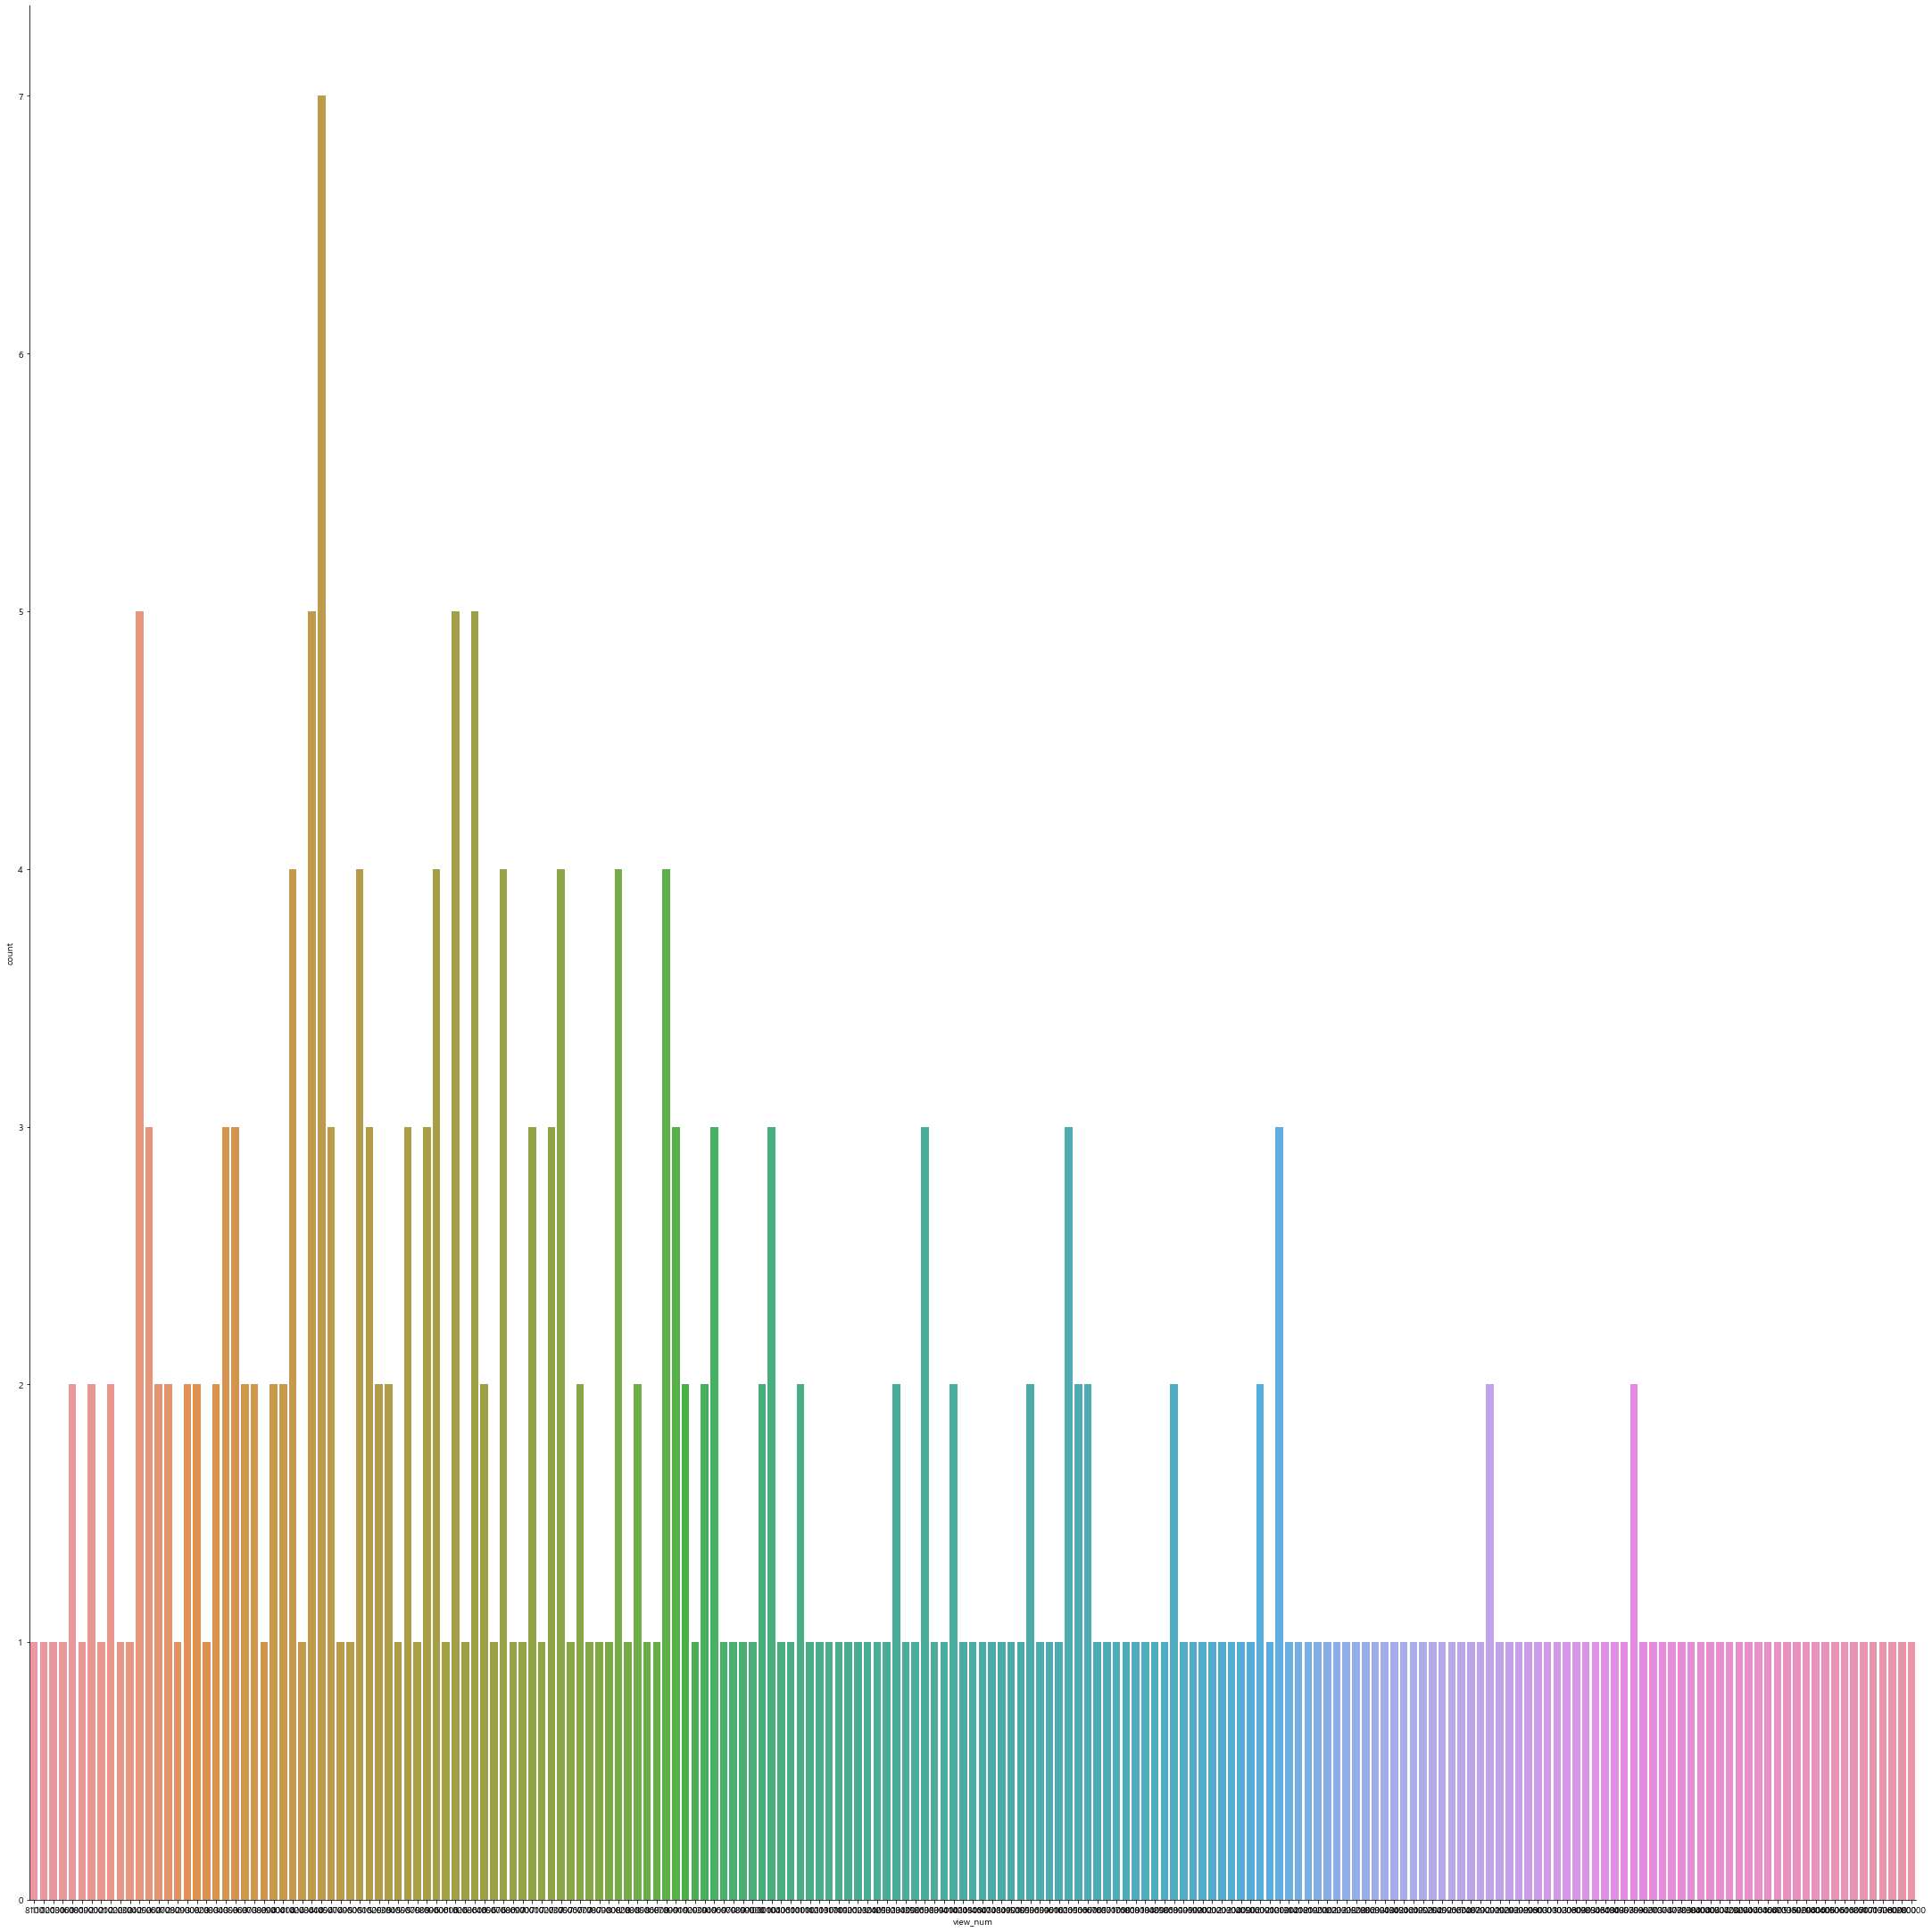

In [25]:
g = sns.factorplot('view_num',data = youtube, kind = 'count', size = 30)
g.set_xlabels

In [26]:
youtube = youtube.dropna(subset=['view_num'])
youtube['view_num2'] = 0
youtube.head()

,title,video_time,view_num,view_num2
0,감자탕! 돼지등뼈 없이도 가능해요 (feat. 찍어먹는 겨자 소스 만들기),728,23000,0
1,🧄마늘은 많이 많이!🧄알리오올리오 떡볶이,561,26000,0
2,"크림 없이 크림새우, 어떻게 만들까요? 재료 간단, 만드는 법은 더 간단!",626,43000,0
3,'부'대찌개맛 '뿌'햄라면,325,58000,0
4,이 카레의 주인공은 '고기'입니다. 고기 듬뿍 뒷다릿살 카레,683,50000,0


In [ ]:
for index in range(len(youtube)):
    if()